<a href="https://colab.research.google.com/github/FatemehImanizadeh/AI-Course-by-SUT-/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
**Cost Function**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


Gradient Descent on linear regression

In [20]:
def h_w(X, W):
  result = W[1] * X + W[0]
  return result

In [21]:
def cost_func(X, y, W):
  cost = np.mean((y - h_w(X, W))**2)
  return cost

In [22]:
def gradient_descent(X, y, W, alpha, epochs):
  n = len(X)
  cost_history = np.zeros(epochs)
  w_history = np.zeros((epochs, 2))
  for i in range(epochs):
    y_pred = h_w(X, W)
    cost = cost_func(X, y, W)
    grad_W0 = (1/n) * np.sum(y_pred - y)
    grad_W1 = (1/n) * np.sum((y_pred - y) * X)
    W[0] -= alpha * grad_W0
    W[1] -= alpha * grad_W1
    cost_history[i] = cost
    w_history[i] = W.copy()
  return W, cost_history, w_history

In [27]:
def generate_data(n, noise):
  X = np.linspace(-5 , 5, n)
  y = 3*X + 3 + np.random.randn(n)*noise
  return X, y

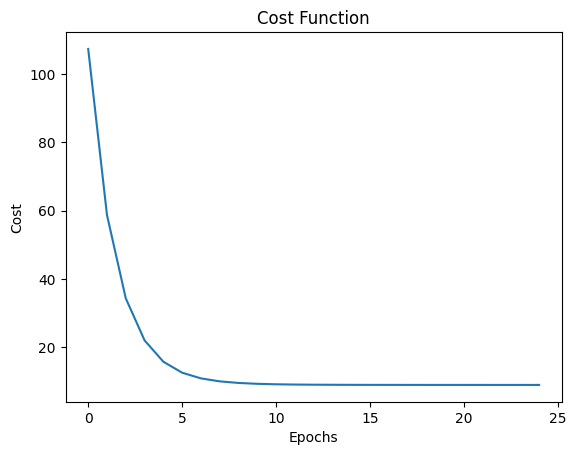

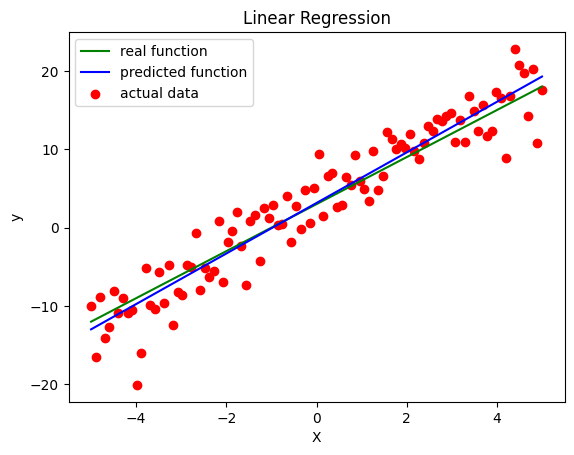

<ipython-input-76-8bc1092f57c6>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(w_history))


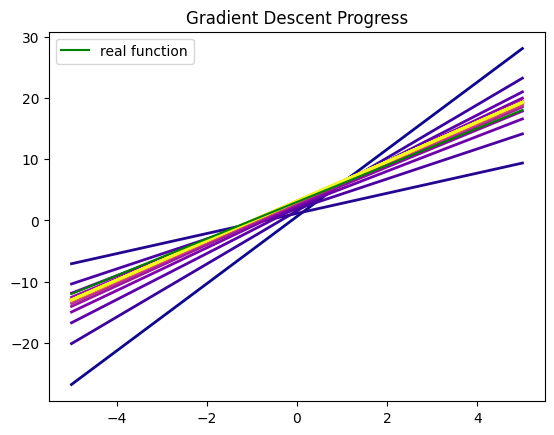

In [76]:
X, y = generate_data(100, 3)
W = [0, 0]
alpha = 0.2
epochs = 25
W, cost_history, w_history = gradient_descent(X, y, W, alpha, epochs)

plt.plot(cost_history)

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()
plt.plot(X, 3*X + 3, label = "real function", color = "green")
plt.plot(X, h_w(X,w_history[-1])  , label = "predicted function", color = "blue")
plt.scatter(X, y, label = "actual data", color = "red")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
import matplotlib.cm as cm
cmap = cm.get_cmap('plasma', len(w_history))
for i in range(len(w_history)):
  plt.plot(X, h_w(X, w_history[i]), color = cmap(i), lw=2)
plt.plot(X, 3*X + 3, label = "real function",color = "green")
plt.title("Gradient Descent Progress")
plt.legend()
plt.show()

**display all cost**

display add values of cost function in proportion to W in gradient descent algorithm

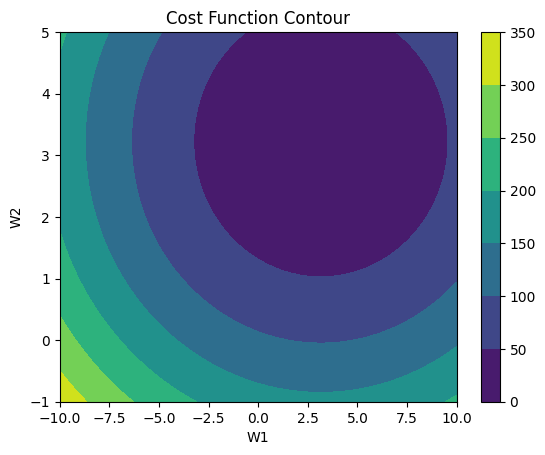

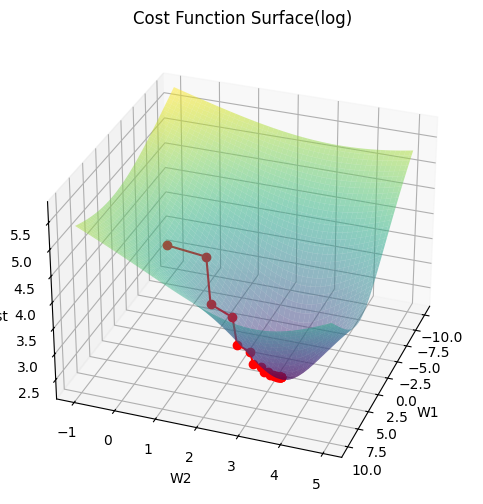

In [83]:
 w1_vals = np.linspace(-10, 10, 100)
 w2_vals = np.linspace(-1, 5, 100)
 cost_vals = np.zeros((len(w1_vals), len(w2_vals)))

for i in range(len(w1_vals)):
  for j in range(len(w2_vals)):
    cost_vals[i, j]= cost_func(X, y, [w1_vals[i], w2_vals[j]])

plt.contourf(w1_vals, w2_vals, cost_vals.T, cmap='viridis')
plt.colorbar()
plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Cost Function Contour')
plt.show()
# define cost in epochs on plot3d
cost_log = np.log(np.array(cost_history))
w0_history = w_history[:, 0]
w1_history = w_history[:, 1]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d',azim = 20, elev =30)
w0, w1 = np.meshgrid(w1_vals, w2_vals)
ax.plot_surface(w0, w1, np.log(cost_vals.T), cmap='viridis', alpha = 0.5)
ax.plot(w1_history, w0_history, cost_log, color='red', marker='o')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface(log)')
plt.show()
